In [214]:
### IMPORT LIBRARIES 

In [193]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
import seaborn as sb
from scipy import stats
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score,mean_absolute_error
from sklearn.ensemble import RandomForestRegressor
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler

import re
import geopandas as gpd
import plotly.express as px
from shapely.geometry import Point

In [97]:
### IMPORT DATA

In [98]:
data = pd.read_csv("C:\\Users\\RAJESH KUMAR\\Desktop\\train.csv")


In [99]:
data.head(5)

,ID,VIN (1-10),County,City,State,ZIP Code,Model Year,Make,Model,Electric Vehicle Type,Clean Alternative Fuel Vehicle (CAFV) Eligibility,Electric Range,Base MSRP,Legislative District,DOL Vehicle ID,Vehicle Location,Electric Utility,Expected Price ($1k)
0,EV33174,5YJ3E1EC6L,Snohomish,LYNNWOOD,WA,98037.0,2020.0,TESLA,MODEL 3,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,308,0,32.0,109821694,POINT (-122.287614 47.83874),PUGET SOUND ENERGY INC,50
1,EV40247,JN1AZ0CP8B,Skagit,BELLINGHAM,WA,98229.0,2011.0,NISSAN,LEAF,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,73,0,40.0,137375528,POINT (-122.414936 48.709388),PUGET SOUND ENERGY INC,15
2,EV12248,WBY1Z2C56F,Pierce,TACOMA,WA,98422.0,2015.0,BMW,I3,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,81,0,27.0,150627382,POINT (-122.396286 47.293138),BONNEVILLE POWER ADMINISTRATION||CITY OF TACOM...,18
3,EV55713,1G1RD6E44D,King,REDMOND,WA,98053.0,2013.0,CHEVROLET,VOLT,Plug-in Hybrid Electric Vehicle (PHEV),Clean Alternative Fuel Vehicle Eligible,38,0,45.0,258766301,POINT (-122.024951 47.670286),PUGET SOUND ENERGY INC||CITY OF TACOMA - (WA),33.9
4,EV28799,1G1FY6S05K,Pierce,PUYALLUP,WA,98375.0,2019.0,CHEVROLET,BOLT EV,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,238,0,25.0,296998138,POINT (-122.321062 47.103797),BONNEVILLE POWER ADMINISTRATION||CITY OF TACOM...,41.78


In [100]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 64353 entries, 0 to 64352
Data columns (total 18 columns):
 #   Column                                             Non-Null Count  Dtype  
---  ------                                             --------------  -----  
 0   ID                                                 64353 non-null  object 
 1   VIN (1-10)                                         64353 non-null  object 
 2   County                                             64349 non-null  object 
 3   City                                               64344 non-null  object 
 4   State                                              64342 non-null  object 
 5   ZIP Code                                           64347 non-null  float64
 6   Model Year                                         64346 non-null  float64
 7   Make                                               64349 non-null  object 
 8   Model                                              64340 non-null  object 
 9   Electr

In [101]:
##### Treating Expected Price ($1k) column 

In [102]:
# Replace 'N/' with NaN and then make the column type as float
data['Expected Price ($1k)'] = data['Expected Price ($1k)'].replace('N/', np.nan).astype(float)

In [103]:
data.describe()

,ZIP Code,Model Year,Electric Range,Base MSRP,Legislative District,DOL Vehicle ID,Expected Price ($1k)
count,64347.000000,64346.000000,64353.000000,64353.000000,64184.000000,6.435300e+04,64340.000000
mean,98143.452888,2018.186212,106.948985,2524.990754,29.951904,1.972905e+08,45.447970
std,2856.064329,2.726742,104.093919,12402.895104,14.661124,1.069466e+08,24.728205
min,745.000000,1993.000000,0.000000,0.000000,0.000000,4.385000e+03,0.000000
25%,98052.000000,2017.000000,14.000000,0.000000,19.000000,1.372865e+08,22.857000
50%,98121.000000,2018.000000,73.000000,0.000000,34.000000,1.753776e+08,40.000000
75%,98370.000000,2021.000000,215.000000,0.000000,43.000000,2.299039e+08,65.900000
max,99701.000000,2022.000000,337.000000,845000.000000,49.000000,4.789346e+08,1100.000000


In [104]:
##### TREATING NULL VALUES ######

In [105]:
data.isnull().sum()


ID                                                     0
VIN (1-10)                                             0
County                                                 4
City                                                   9
State                                                 11
ZIP Code                                               6
Model Year                                             7
Make                                                   4
Model                                                 13
Electric Vehicle Type                                  0
Clean Alternative Fuel Vehicle (CAFV) Eligibility      0
Electric Range                                         0
Base MSRP                                              0
Legislative District                                 169
DOL Vehicle ID                                         0
Vehicle Location                                     510
Electric Utility                                     722
Expected Price ($1k)           

In [106]:
# fill null values in numerical columns with mean value
data['Expected Price ($1k)'].fillna(data['Expected Price ($1k)'].mean(), inplace=True)
data['Legislative District'].fillna(data['Legislative District'].mean(), inplace=True)

In [107]:
#  fill null values in categorical columns with mode
columns_to_fill = ['Vehicle Location','Electric Utility','County','City','State',
                   'ZIP Code','Model Year','Make','Model']                                               

# Fill null values in the selected columns with mode value
for col in columns_to_fill:
    mode_value = data[col].mode()[0]  # Get the mode value
    data[col].fillna(mode_value, inplace=True)

In [108]:
data.isnull().sum()

ID                                                   0
VIN (1-10)                                           0
County                                               0
City                                                 0
State                                                0
ZIP Code                                             0
Model Year                                           0
Make                                                 0
Model                                                0
Electric Vehicle Type                                0
Clean Alternative Fuel Vehicle (CAFV) Eligibility    0
Electric Range                                       0
Base MSRP                                            0
Legislative District                                 0
DOL Vehicle ID                                       0
Vehicle Location                                     0
Electric Utility                                     0
Expected Price ($1k)                                 0
dtype: int

In [ ]:
#### Feature Reduction 
## removing irrelevant features can improve model performance by reducing noise 
##  and focusing on the most important information. 

In [132]:
data['Base MSRP'].unique()   ## to find unique values in base msrp

array([0.])

In [133]:
column_to_drop =['Base MSRP','ZIP Code','DOL Vehicle ID']  

In [134]:
data.drop(column_to_drop, axis=1, inplace=True)

In [135]:
## Numeric columns
numeric_columns=['Electric Range','Legislative District','Model Year','Expected Price ($1k)']
## removed Zip code and DOL vehicle Id from this list

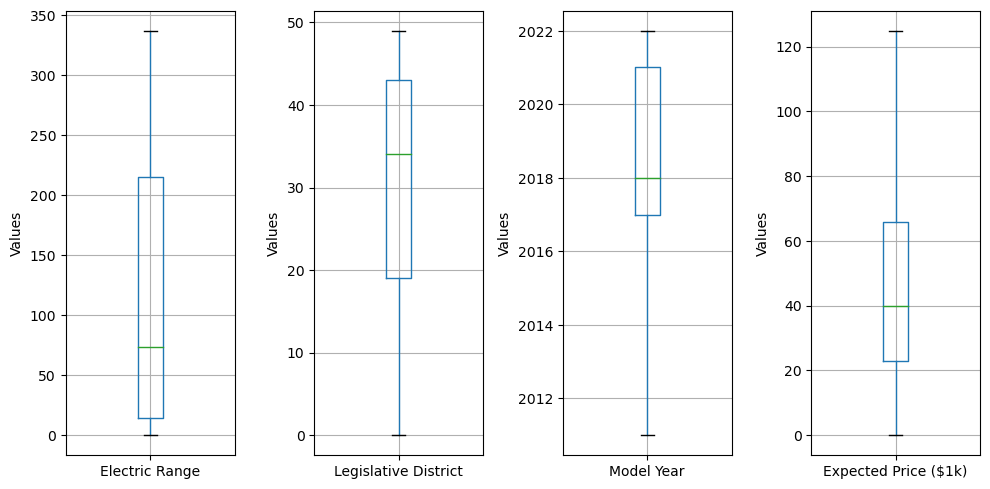

In [137]:
# Create boxplots for selected columns
fig, axes = plt.subplots(nrows=1, ncols=len(numeric_columns), figsize=(10, 5))

for i, column in enumerate(numeric_columns):
    data.boxplot(column=column, ax=axes[i])
    axes[i].set_ylabel('Values')

plt.tight_layout()
plt.show()

In [111]:
## TREATING OUTLIERS 

In [138]:
selected_columns=['Model Year','Expected Price ($1k)']

In [139]:
# Define a function to treat outliers using percentiles
def treat_outliers_percentile(column, lower_percentile=0.25, upper_percentile=0.75):
    q1 = column.quantile(lower_percentile)
    q3 = column.quantile(upper_percentile)
    iqr = q3 - q1
    lower_bound = q1 - 1.5 * iqr
    upper_bound = q3 + 1.5 * iqr
    column = np.where(column < lower_bound, q1, column)
    column = np.where(column > upper_bound, q3, column)
    return column

In [140]:
# Treat outliers in selected columns using percentiles
for column in selected_columns:
    data[column] = treat_outliers_percentile(data[column])

In [141]:
### Treating outliers by imputing upper and lower bounds

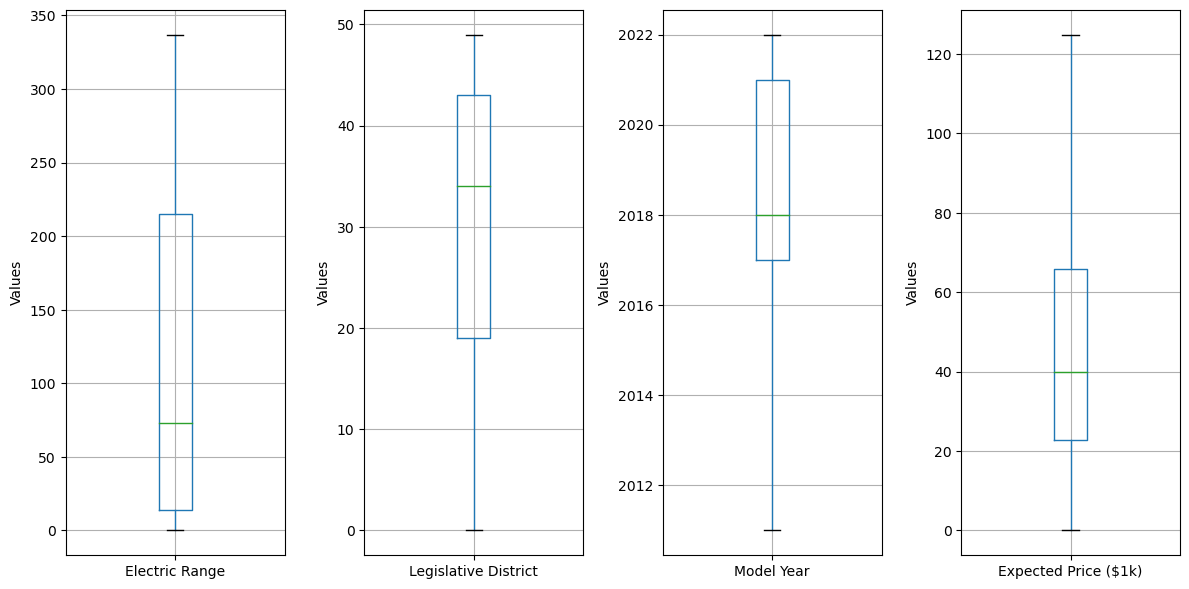

In [142]:
# Create subplots for selected columns
fig, axes = plt.subplots(nrows=1, ncols=len(numeric_columns), figsize=(12, 6))

for i, column in enumerate(numeric_columns):
    data.boxplot(column=column, ax=axes[i])
    axes[i].set_ylabel('Values')

plt.tight_layout()
plt.show()

In [143]:
##### Feature engineering ######

In [144]:
###In our dataset, the Vehicle Location column contains both latitude and longitude coordinates as a string.
#### To make these coordinates more accessible for further analysis, we will perform the following feature engineering steps:

#Convert the Vehicle Location column to string type.
#Create two new columns in the DataFrame, latitude and longitude.
#Extract latitude and longitude values from the Vehicle Location column and store them in the respective new columns.

In [145]:
# Convert the 'Vehicle Location' column to string type
data['Vehicle Location'] = data['Vehicle Location'].astype(str)

In [146]:
# Extract the latitude and longitude from the 'Vehicle Location' column
def extract_coordinates(x, index):
    coords = re.findall(r'-?\d+\.\d+', x)
    if len(coords) >= 2:
        return float(coords[index])
    else:
        return None

In [147]:

data['latitude'] = data['Vehicle Location'].apply(lambda x: extract_coordinates(x, 0))
data['longitude'] = data['Vehicle Location'].apply(lambda x: extract_coordinates(x, 1))

data= data.dropna(subset=['latitude', 'longitude'])

In [148]:
### Concatenate city, county, state as location

In [149]:
data['Location'] = data['County'] + ', ' + data['City'] + ', ' + data['State']

In [150]:
### conerting electric range category to a category column

In [151]:
def create_electric_range_category(df, column='Electric Range'):
    def categorize_range(electric_range):
        if electric_range == 0:
            return "Unknown"
        elif electric_range < 150:
            return "Short"
        elif electric_range < 300:
            return "Medium"
        else:
            return "Long"

    data['Electric_Range_Category'] = data[column].apply(categorize_range)
    return df

data = create_electric_range_category(data, column='Electric Range')


In [62]:
######### VISUALIZATIONS #######

C:\Users\RAJESH KUMAR\AppData\Local\Temp\ipykernel_4828\3133334731.py:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(data.corr(), annot = True, cmap="YlGnBu")


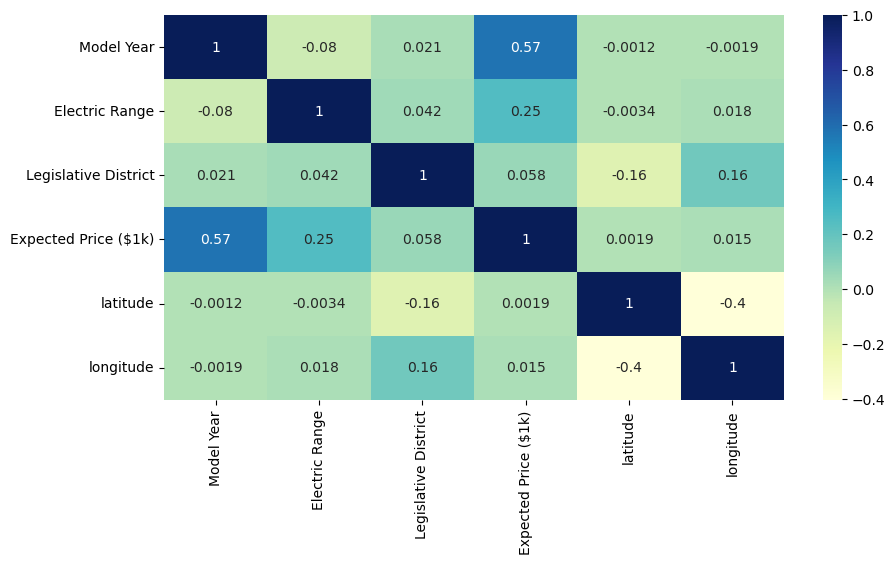

In [154]:
#Correlation using heatmap
plt.figure(figsize = (10,5))
sns.heatmap(data.corr(), annot = True, cmap="YlGnBu")
plt.show()

In [ ]:
## Univariate Analysis

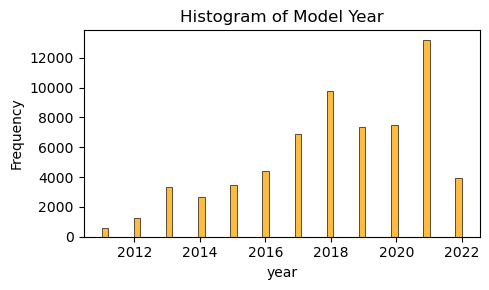

In [216]:
# Create a histogram (histplot) for the model yearvariable using seaborn
plt.figure(figsize=(5,3))  # Set the figure size
sns.histplot(data['Model Year'], kde=False, color='orange')

# Add title and labels
plt.title('Histogram of Model Year')
plt.xlabel('year')
plt.ylabel('Frequency')

# Show the plot
plt.tight_layout()
plt.show()

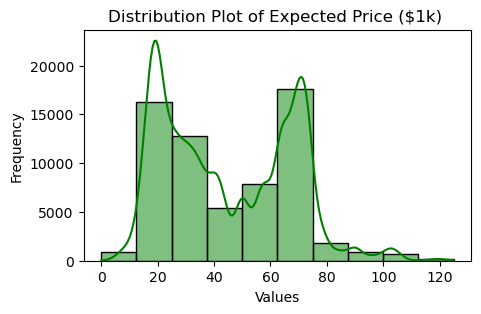

In [65]:
# Create a distribution plot (histogram)
plt.figure(figsize=(5, 3))
sns.histplot(data['Expected Price ($1k)'], bins=10, kde=True,color='green')  
plt.title('Distribution Plot of Expected Price ($1k) ')
plt.xlabel('Values')
plt.ylabel('Frequency')
plt.show()

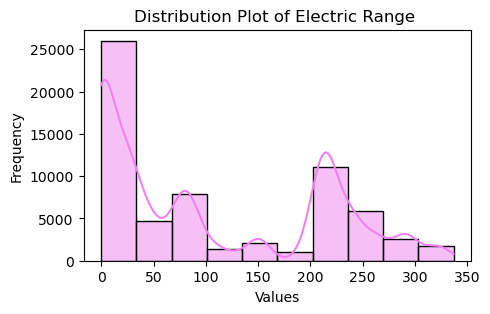

In [218]:
# Create a distribution plot (histogram)
plt.figure(figsize=(5, 3))
sns.histplot(data['Electric Range'], bins=10, kde=True,color='violet')  
plt.title('Distribution Plot of Electric Range ')
plt.xlabel('Values')
plt.ylabel('Frequency')
plt.show()

In [66]:
# Get value counts for each city
city_counts = data['City'].value_counts()

# Select top 10 city
top_10_city = city_counts.head(10)


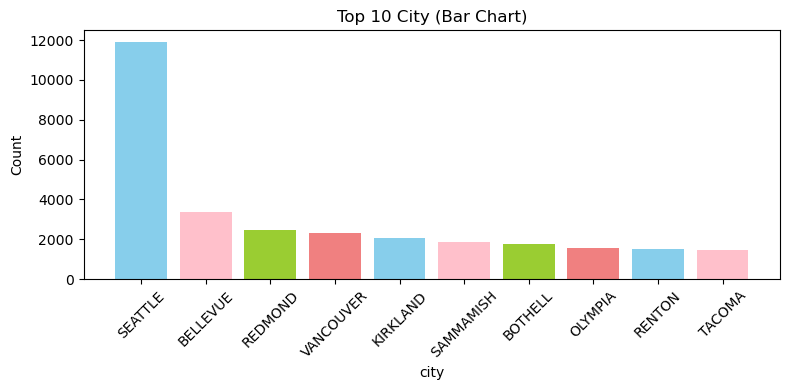

In [67]:
# Create a bar chart
plt.figure(figsize=(8, 4))
plt.bar(top_10_city.index, top_10_city, color=['skyblue','pink', 'yellowgreen', 'lightcoral'])
plt.title('Top 10 City (Bar Chart)')
plt.xlabel('city')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [68]:
# Get value counts of counties
county_counts = data['County'].value_counts()

# Select top 5 counties
top_5_counties = county_counts.head(5)


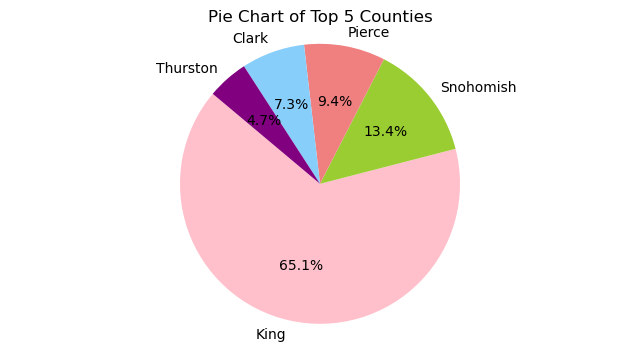

In [69]:
# Create a pie chart
plt.figure(figsize=(8, 4))
plt.pie(top_5_counties, labels=top_5_counties.index, autopct='%1.1f%%', startangle=140,
        colors = ['pink', 'yellowgreen', 'lightcoral', 'lightskyblue', 'purple'])
plt.title('Pie Chart of Top 5 Counties')
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle
plt.show()

In [70]:
# Get value counts of make
make_counts = data['Make'].value_counts()

# Select top 5 make
top_10_make = make_counts.head(10)


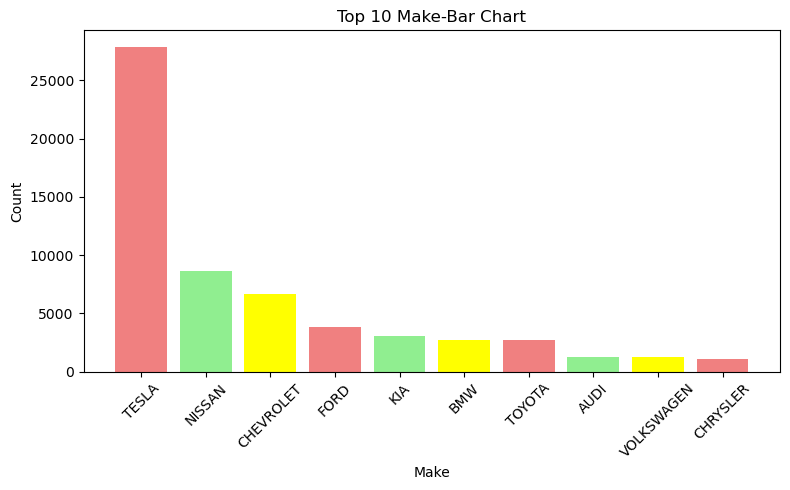

In [71]:
# Create a bar chart
plt.figure(figsize=(8, 5))
plt.bar(top_10_make.index, top_10_make, color=['lightcoral','lightgreen','yellow'])
plt.title('Top 10 Make-Bar Chart')
plt.xlabel('Make')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [72]:
# Get value counts of EV Type
EVType_counts = data['Electric Vehicle Type'].value_counts()

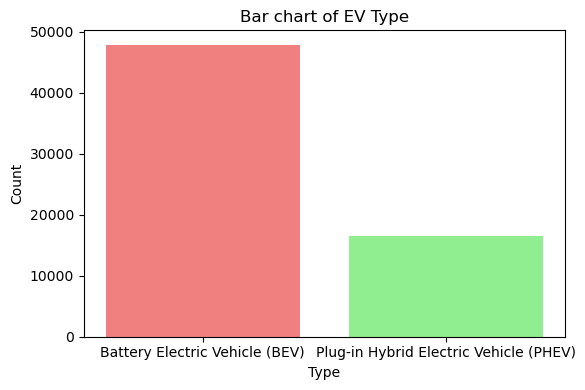

In [92]:
# Create a bar chart
plt.figure(figsize=(6, 4))
plt.bar(EVType_counts.index, EVType_counts, color=['lightcoral','lightgreen'])
plt.title('Bar chart of EV Type')
plt.xlabel('Type')
plt.ylabel('Count')
plt.tight_layout()
plt.show()

In [74]:
# Get value counts of CAFV Eligiblity
CAFV_counts = data['Clean Alternative Fuel Vehicle (CAFV) Eligibility'].value_counts()

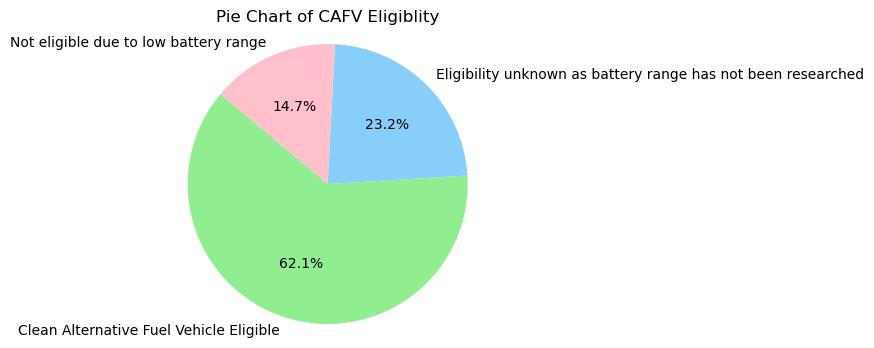

In [75]:
# Create a pie chart
plt.figure(figsize=(8, 4))
plt.pie(CAFV_counts, labels=CAFV_counts.index, autopct='%1.1f%%', startangle=140,
        colors = ['lightgreen', 'lightskyblue', 'pink'])
plt.title('Pie Chart of CAFV Eligiblity')
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle
plt.show()

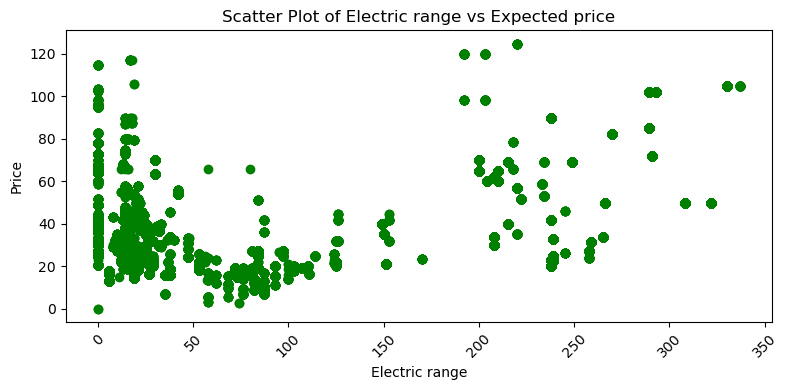

In [79]:
# Create a scatter plot of Electric range vs Price 
plt.figure(figsize=(8, 4))
plt.scatter(data['Electric Range'], data['Expected Price ($1k)'], color='green')
plt.title('Scatter Plot of Electric range vs Expected price')
plt.xlabel('Electric range')
plt.ylabel('Price')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

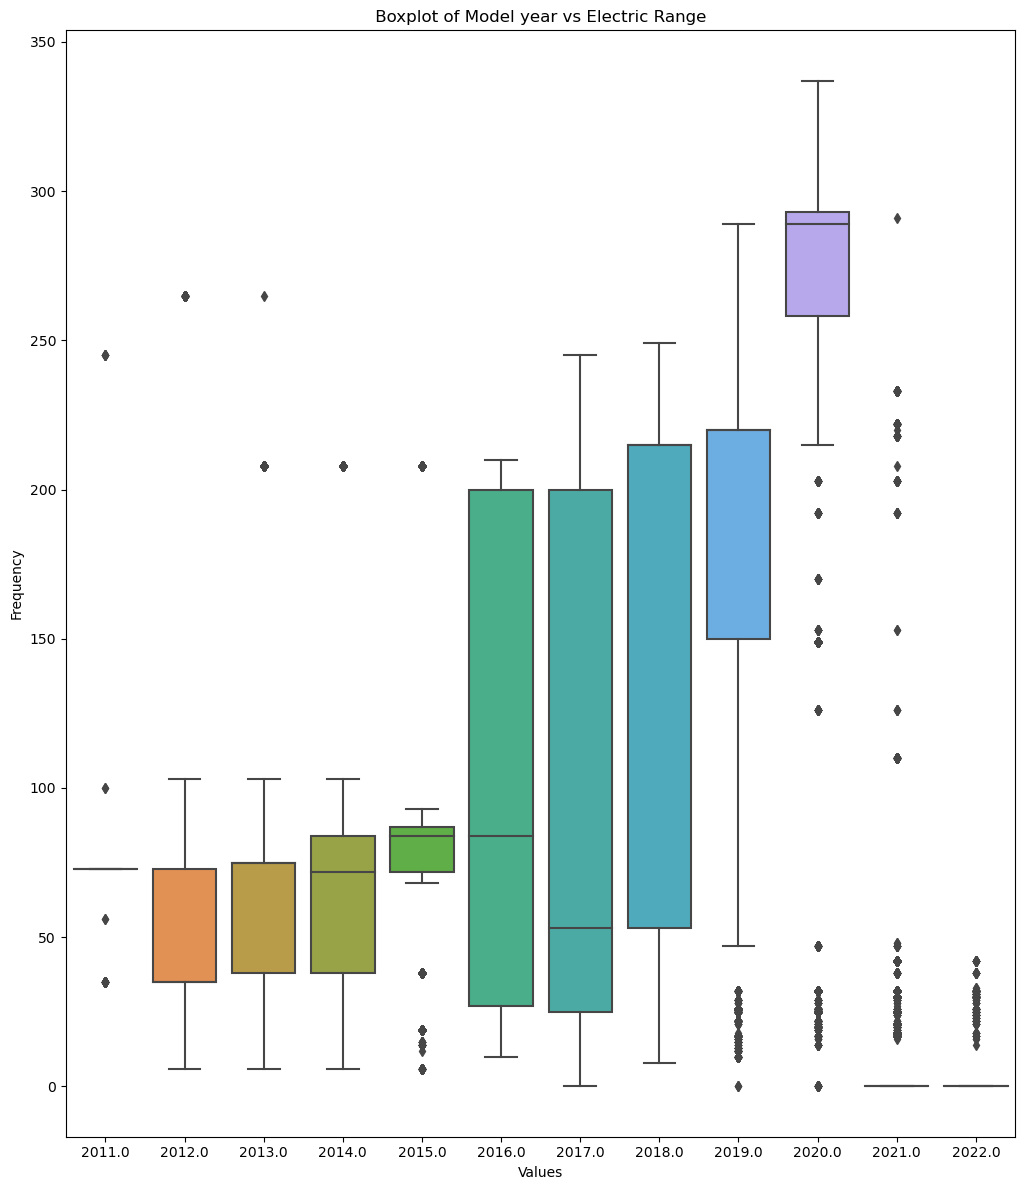

In [243]:
plt.figure(figsize=(20,12))
plt.subplot(1,2,1)
sns.boxplot(x = data['Model Year'], y = data['Electric Range'])
plt.title(' Boxplot of Model year vs Electric Range ')
plt.xlabel('Values')
plt.ylabel('Frequency')
plt.tight_layout()


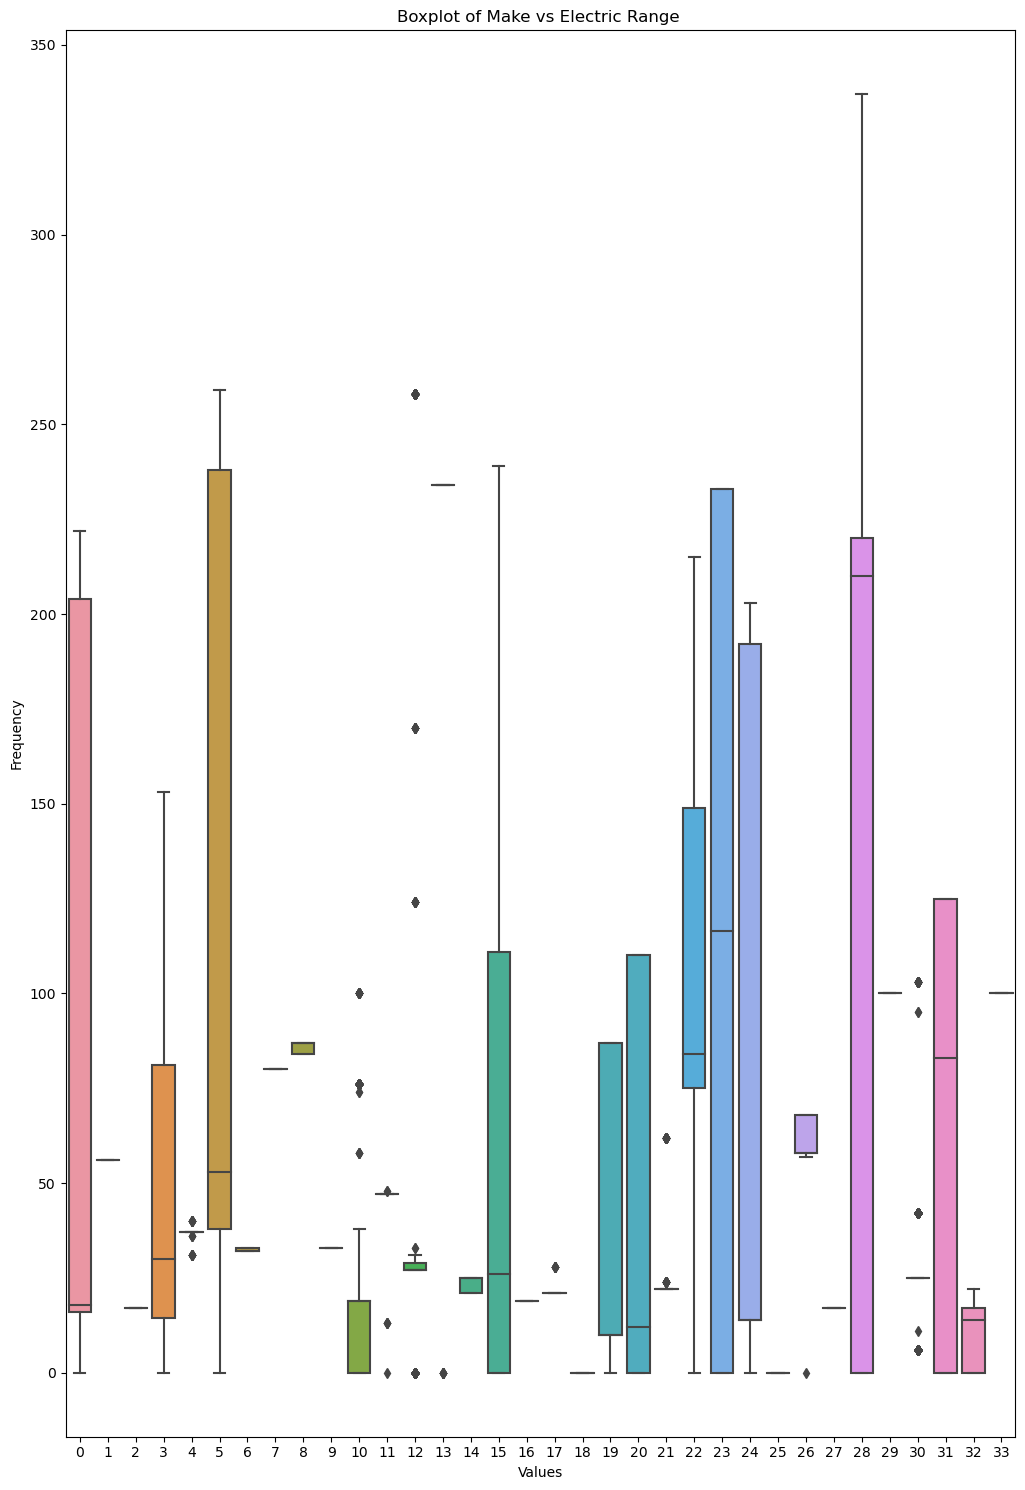

In [244]:
plt.figure(figsize=(20, 15))
plt.subplot(1,2,2)
sns.boxplot(x = data['Make'], y =data ['Electric Range'])
plt.title('Boxplot of Make vs Electric Range ')
plt.xlabel('Values')
plt.ylabel('Frequency')
plt.tight_layout()

In [ ]:
###### MODEL 1: LINEAR REGRESSON WITH LABEL ENCODING 

In [ ]:
### droping the following columns as they are converted into location,latitude,longitude

In [162]:
column_to_drop = ['City','County','State','Vehicle Location']

In [163]:
data.drop(column_to_drop, axis=1, inplace=True)

In [164]:
### CONVERT CATEGORICAL TO NUMERIC  BY LABEL ENCODING

In [165]:
def convert_categorical_to_numeric(dataframe):
    label_encoder = LabelEncoder()
    for column in dataframe.columns:
        if dataframe[column].dtype == 'object':
            dataframe[column] = label_encoder.fit_transform(dataframe[column])

In [166]:
convert_categorical_to_numeric(data)


In [167]:
# Splitting data into Independent and Dependent Variable
X = data.drop('Expected Price ($1k)', axis=1)
y = data['Expected Price ($1k)']

In [168]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2, random_state=0)


In [169]:
# Create a linear regression model
model = LinearRegression()

# Train the model on the training data
model.fit(X_train, y_train)

LinearRegression()

In [170]:
# Make predictions on the test data
y_pred = model.predict(X_test)

In [171]:

# Calculate the Mean Squared Error
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print('R Square : ', r2)
print("Mean Squared Error:", mse)

R Square :  0.6043435299297317
Mean Squared Error: 208.1389897241402


In [172]:
print(model.coef_)
print(model.intercept_)

[-2.00236623e-06  2.81556186e-04  3.41637578e+00  7.81751251e-01
  1.60023422e-01  2.06091745e+00  2.61260891e+00  1.85324323e-01
  1.20559997e-02  3.05162322e-02  2.61620783e-01  3.37272953e-01
 -5.25172769e-03  1.64395426e+01]
-6912.0441160572755


In [173]:
# Predicting Test Set Results
y_pred = model.predict(X_test)
y_pred = np.round_(y_pred, decimals = 2)

In [174]:
# Real Values vs Predicted Values
pd.DataFrame({'Actual Price': y_test, 'Predicted Price': y_pred})

,Actual Price,Predicted Price
42213,50.000,61.85
40591,102.000,75.68
43782,62.000,41.44
35724,72.000,76.57
34608,57.000,59.23
...,...,...
34392,57.000,59.73
39394,38.500,47.93
2460,39.000,16.84
20252,59.979,31.12


In [ ]:
###### MODEL 2 : LINEAR REGRESSION USING DUMMIES ENCODING / ONE HOT ENCODING

In [177]:
# Perform one-hot encoding
data_encoded = pd.get_dummies(data, columns=['Location','Electric Vehicle Type',
    'Clean Alternative Fuel Vehicle (CAFV) Eligibility','Make','Electric Utility'])


In [178]:
data_encoded.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 64353 entries, 0 to 64352
Columns: 709 entries, ID to Electric Utility_67
dtypes: float64(5), int32(4), int64(1), uint8(699)
memory usage: 46.8 MB


In [179]:
# Split into features and target variable
X = data_encoded.drop('Expected Price ($1k)', axis=1)
y = data_encoded['Expected Price ($1k)']

In [180]:
# Split into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [181]:
# Create and train the linear regression model
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [182]:
# Make predictions
y_pred = model.predict(X_test)

In [185]:
# Calculate the Mean Squared Error
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print('R Square : ', r2)
print("Mean Squared Error:", mse)

R Square :  0.8285765936934757
Mean Squared Error: 89.967250001839


In [ ]:
##### MODEL 3 : LINEAR REGRESSION WITH STANDARDIZED VALUE

In [199]:
# Select columns to be standardized
columns_to_standardize = ['Electric Range']

In [200]:
# Split into features and target variable
X = data.drop('Expected Price ($1k)', axis=1)
y = data['Expected Price ($1k)']


In [201]:
# Split into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [202]:
# Apply standardization to selected columns
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train[columns_to_standardize])
X_test_scaled = scaler.transform(X_test[columns_to_standardize])

In [203]:
# Combine standardized columns with other columns
X_train_processed = np.concatenate([X_train_scaled, X_train.drop(columns_to_standardize, axis=1)], axis=1)
X_test_processed = np.concatenate([X_test_scaled, X_test.drop(columns_to_standardize, axis=1)], axis=1)

In [206]:
# Create and train the linear regression model
model = LinearRegression()
model.fit(X_train_processed, y_train)

LinearRegression()

In [207]:
# Make predictions
y_pred = model.predict(X_test_processed)

In [208]:
# Calculate the Mean Squared Error
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print('R Square : ', r2)
print("Mean Squared Error:", mse)

R Square :  0.6023384336697242
Mean Squared Error: 208.70264058448578
